In [1]:
import numpy as np
import pandas as pd
import scipy
import sklearn
from sklearn.manifold import TSNE
import pickle
# from Bio.Cluster import kcluster
import os
import numpy as np
import yaml
import os
import pandas
from collections import Counter
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
# from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import sys
import seaborn as sns
# import pyclustering
from shutil import copyfile
import matplotlib as plt
# ------- SERVER EXTENSIONS ---------
lib =  r'/srv01/technion/shitay/Code/classifying_response_to_immunotherapy/utilities/droplet_dataset'
lib2 = r'/srv01/technion/shitay/Code/classifying_response_to_immunotherapy/utilities'
lib3 = r'/srv01/technion/shitay/Code/classifying_response_to_immunotherapy/data_analysis'
lib4 = r'/srv01/technion/shitay/Code/classifying_response_to_immunotherapy'
lib5 = r'/srv01/technion/shitay/Code/classifying_response_to_immunotherapy/scripts'
import sys
sys.path.append(lib)
sys.path.append(lib2)
sys.path.append(lib3)
sys.path.append(lib4)
sys.path.append(lib5)
# ------- SERVER EXTENSIONS ---------

In [2]:
COHORT_PATH = r'/storage/md_keren/shitay/liron_project/Liron_data/droplet_seq/cohort/normalized/28.7.21/immune_cells_28.7.21_4k_genes.pkl'
cohort = pickle.load(open(COHORT_PATH, 'rb'))


In [19]:

df = pd.DataFrame(cohort.counts, columns=[cohort.gene_names, cohort.features], index=[cohort.barcodes, cohort.samples])


In [21]:
df.to_csv(r'/storage/md_keren/shitay/liron_project/Liron_data/droplet_seq/cohort/normalized/28.7.21/immune_cells_28.7.21_4k_genes.csv')

In [22]:
df

FGR           KRIT1             BAD  \
                        ENSG00000000938 ENSG00000001631 ENSG00000002330   
AAACCTGCACCAGGCT-1 MR38             0.0        3.042383             0.0   
AAACCTGCACGGACAA-1 MR38             0.0        3.139551             0.0   
AAACCTGCAGGAATCG-1 MR38             0.0        0.000000             0.0   
AAACCTGGTAAGTAGT-1 MR38             0.0        0.000000             0.0   
AAACCTGGTCCCGACA-1 MR38             0.0        0.000000             0.0   
...                                 ...             ...             ...   
TTTGTCAAGTGTACTC-1 MR48             0.0        0.000000             0.0   
TTTGTCAGTAGCAAAT-1 MR48             0.0        0.000000             0.0   
TTTGTCATCATTTGGG-1 MR48             0.0        0.000000             0.0   
TTTGTCATCCTTGGTC-1 MR48             0.0        0.000000             0.0   
TTTGTCATCTGAAAGA-1 MR48             0.0        0.000000             0.0   

                                   LAP3            CD99          MAD1L1  \
                        ENSG00000002549 ENSG00000002586 ENSG00000002822   
AAACCTGCACCAGGCT-1 MR38        0.000000        3.952056        3.042383   
AAACCTGCACGGACAA-1 MR38        0.000000        3.139551        0.000000   
AAACCTGCAGGAATCG-1 MR38        0.000000        3.828396        0.000000   
AAACCTGGTAAGTAGT-1 MR38        1.310054        2.790362        0.000000   
AAACCTGGTCCCGACA-1 MR38        0.000000        2.263069        0.000000   
...                                 ...             ...             ...   
TTTGTCAAGTGTACTC-1 MR48        0.000000        0.000000        0.000000   
TTTGTCAGTAGCAAAT-1 MR48        2.434889        1.679700        0.000000   
TTTGTCATCATTTGGG-1 MR48        0.000000        0.000000        0.000000   
TTTGTCATCCTTGGTC-1 MR48        0.000000        0.000000        0.000000   
TTTGTCATCTGAAAGA-1 MR48        0.000000        0.000000        0.000000   

                                  LASP1            M6PR           CFLAR  \
                        ENSG00000002834 ENSG00000003056 ENSG00000003402   
AAACCTGCACCAGGCT-1 MR38        0.000000        0.000000        0.000000   
AAACCTGCACGGACAA-1 MR38        0.000000        0.000000        0.000000   
AAACCTGCAGGAATCG-1 MR38        2.104813        0.000000        2.104813   
AAACCTGGTAAGTAGT-1 MR38        1.985142        1.985142        0.000000   
AAACCTGGTCCCGACA-1 MR38        2.263069        0.000000        2.263069   
...                                 ...             ...             ...   
TTTGTCAAGTGTACTC-1 MR48        0.000000        3.110934        0.000000   
TTTGTCAGTAGCAAAT-1 MR48        0.000000        2.434889        0.000000   
TTTGTCATCATTTGGG-1 MR48        0.000000        2.964405        0.000000   
TTTGTCATCCTTGGTC-1 MR48        0.000000        0.000000        0.000000   
TTTGTCATCTGAAAGA-1 MR48        0.000000        0.000000        0.000000   

                                   RBM5  ...            CLN3           OVCA2  \
                        ENSG00000003756  ... ENSG00000261832 ENSG00000262664   
AAACCTGCACCAGGCT-1 MR38             0.0  ...             0.0        0.000000   
AAACCTGCACGGACAA-1 MR38             0.0  ...             0.0        0.000000   
AAACCTGCAGGAATCG-1 MR38             0.0  ...             0.0        0.000000   
AAACCTGGTAAGTAGT-1 MR38             0.0  ...             0.0        0.000000   
AAACCTGGTCCCGACA-1 MR38             0.0  ...             0.0        2.263069   
...                                 ...  ...             ...             ...   
TTTGTCAAGTGTACTC-1 MR48             0.0  ...             0.0        0.000000   
TTTGTCAGTAGCAAAT-1 MR48             0.0  ...             0.0        0.000000   
TTTGTCATCATTTGGG-1 MR48             0.0  ...             0.0        0.000000   
TTTGTCATCCTTGGTC-1 MR48             0.0  ...             0.0        0.000000   
TTTGTCATCTGAAAGA-1 MR48             0.0  ...             0.0        0.000000   

                            CTB-133G6.1           RPL17          UQ

In [2]:
# tumor_path = r'/storage/md_keren/shitay/Data/droplet_seq/cohort/normalized/5.21/cohort_normalized_24.5.21.pkl'
COHORT_PATH = r'/storage/md_keren/shitay/Data/droplet_seq/cohort/normalized/6.21/cohort_normalized_26.6.21.pkl'

# tumor_cohort = pickle.load(open(tumor_path, 'rb'))
cohort = pickle.load(open(COHORT_PATH, 'rb'))
# tumor_cohort = cohort.filter_cells_by_property('is_cancer', True)


In [5]:
cohort.counts.shape

(221340, 32738)

In [23]:
cohort.counts[:10,:20].sum(axis=1).shape

(10,)

In [26]:
len(np.where(cohort.counts[:10,:20].sum(axis=1))[0])

1000

In [63]:
num_exp_genes = (cohort.counts>0).sum(axis=1)

<AxesSubplot:ylabel='Count'>

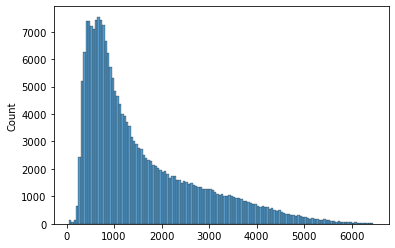

In [77]:
sns.histplot(num_exp_genes, bins=np.arange(50,6500,50).tolist())

In [68]:
print(sum(num_exp_genes<500))
len(num_exp_genes)

29812


221340

In [69]:
sub_cohort = cohort[num_exp_genes<500]

In [75]:
sum(sub_cohort.cells_information.getattr('is_immune'))

6998

Variance 0.315
Counts shape (89024, 4074)


Text(0.5, 1.0, 'Variance > 0.315, 4074 genes')

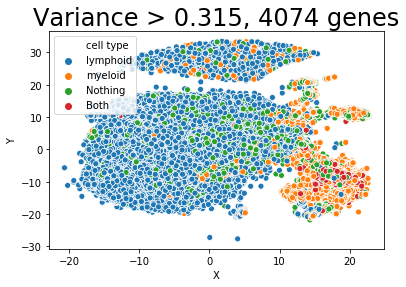

In [3]:
variance = 0.315
print(f"Variance {variance}")
filtered_cells_path = fr'/storage/md_keren/shitay/outputs/variance_filtered/immune_cells_var{variance}.pkl'
filtered_cells = pickle.load(open(filtered_cells_path, 'rb'))
print(f'Counts shape {filtered_cells.counts.shape}')
TSNE_path = fr'/storage/md_keren/shitay/outputs/TSNE/immune_TSNE_embedded_var{variance}.pkl'

cells_embedded = pickle.load(open(TSNE_path, 'rb'))
# plt.pyplot.scatter(cells_embedded[:,0], cells_embedded[:,1], c=filtered_cells.get_myeloid_lymphoid_map()[0])

df = pd.DataFrame(cells_embedded, columns=['X', 'Y'])
df["cell type"] = filtered_cells.get_myeloid_lymphoid_map()[1]
lm = sns.scatterplot(x="X", y="Y",
              hue="cell type",
              data=df)
plt.pyplot.title(f"Variance > {variance}, {filtered_cells.counts.shape[1]} genes", size=24)

Text(0.5, 1.0, 'T cells')

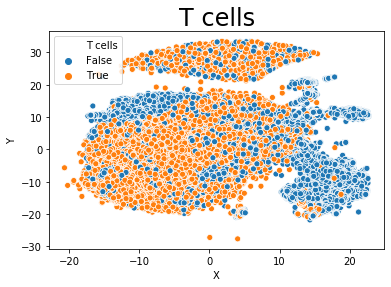

In [4]:

df = pd.DataFrame(cells_embedded, columns=['X', 'Y'])
cell_type = 'T cells'
df[cell_type] = [cell_type in vv for vv in filtered_cells.cells_information.getattr('cell_type_list')]
lm = sns.scatterplot(x="X", y="Y",
              hue=cell_type,
              data=df)
plt.pyplot.title(f"{cell_type}", size=24)

Text(0.5, 1.0, 'CD8 Cytotoxic T cells')

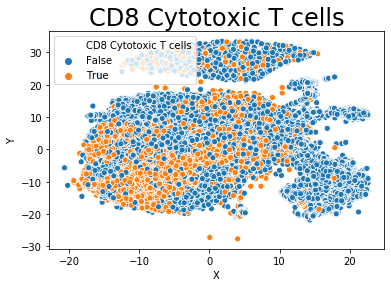

In [5]:
df = pd.DataFrame(cells_embedded, columns=['X', 'Y'])
cell_type = 'CD8 Cytotoxic T cells'
df[cell_type] = [cell_type in vv for vv in filtered_cells.cells_information.getattr('cell_type_list')]
lm = sns.scatterplot(x="X", y="Y",
              hue=cell_type,
              data=df)
plt.pyplot.title(f"{cell_type}", size=24)

Text(0.5, 1.0, 'B cells')

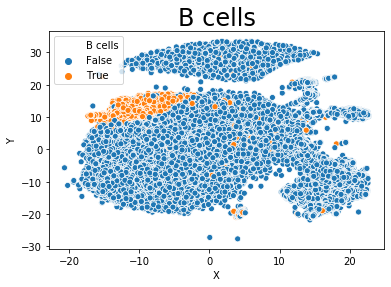

In [6]:
df = pd.DataFrame(cells_embedded, columns=['X', 'Y'])
cell_type = 'B cells'
df[cell_type] = [cell_type in vv for vv in filtered_cells.cells_information.getattr('cell_type_list')]
lm = sns.scatterplot(x="X", y="Y",
              hue=cell_type,
              data=df)
plt.pyplot.title(f"{cell_type}", size=24)

Text(0.5, 1.0, 'Activated T cells')

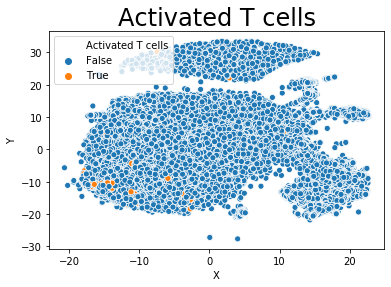

In [9]:
df = pd.DataFrame(cells_embedded, columns=['X', 'Y'])
cell_type = 'Activated T cells'
df[cell_type] = [cell_type in vv for vv in filtered_cells.cells_information.getattr('cell_type_list')]
lm = sns.scatterplot(x="X", y="Y",
              hue=cell_type,
              data=df)
plt.pyplot.title(f"{cell_type}", size=24)

In [ ]:
df = pd.DataFrame(cells_embedded, columns=['X', 'Y'])
cell_type = 'NK cells'
df[cell_type] = [cell_type in vv for vv in filtered_cells.cells_information.getattr('cell_type_list')]
lm = sns.scatterplot(x="X", y="Y",
              hue=cell_type,
              data=df)
plt.pyplot.title(f"{cell_type}", size=24)

In [4]:
200 * 30 * 1000**2

6000000000

In [7]:
(6000000000 / (15 * 1000 ** 2) )/8

50.0

Text(0.5, 1.0, '4 clusters')

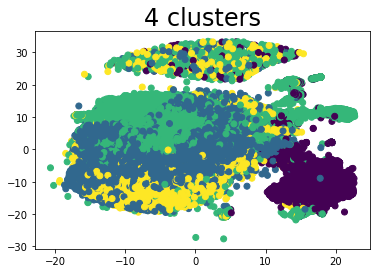

In [32]:
k = 4
path = fr'/storage/md_keren/shitay/outputs/kmeans/row_kmeans/kmeans_immune_cells_var0.315_k_{k}.pkl'

kmeans = pickle.load(open(path, 'rb'))
len(kmeans['clusters'][0])

# Set colors with clusters
cluster_colors = np.zeros(filtered_cells.number_of_cells)
for cluster_idx, cluster_list in enumerate(kmeans['clusters']):
    cluster_colors[cluster_list] = cluster_idx
    
plt.pyplot.scatter(cells_embedded[:,0], cells_embedded[:,1], c=cluster_colors)
plt.pyplot.title(f"{k} clusters", size=24)

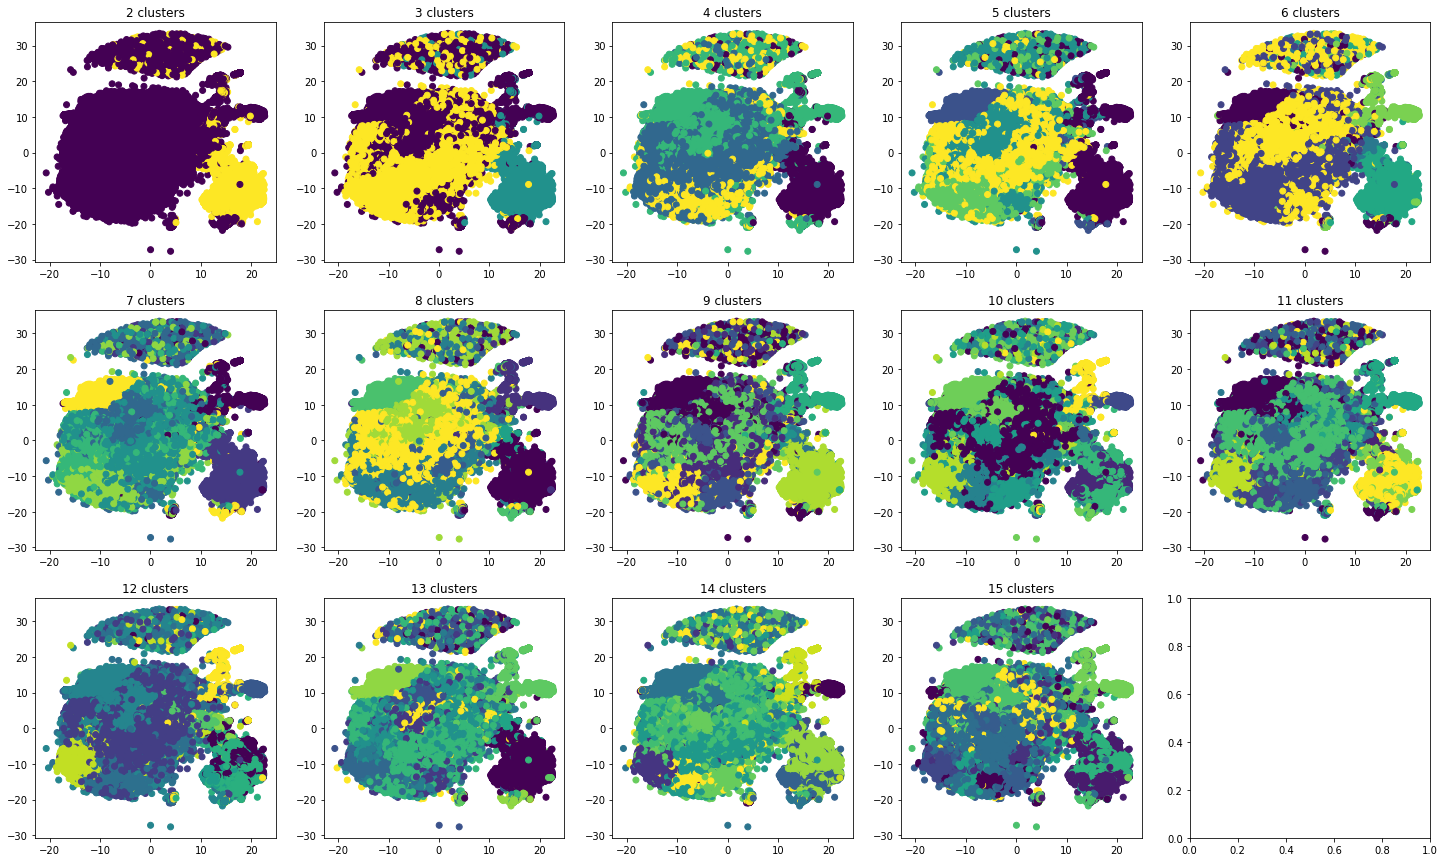

In [42]:
fig, axs = plt.pyplot.subplots(3, 5)
fig.set_size_inches(25, 15)

i = 0
j = 0
for k in range(2, 16):
       
    path = fr'/storage/md_keren/shitay/outputs/kmeans/row_kmeans/kmeans_immune_cells_var0.315_k_{k}.pkl'
    kmeans = pickle.load(open(path, 'rb'))

    # Set colors with clusters
    cluster_colors = np.zeros(filtered_cells.number_of_cells)
    for cluster_idx, cluster_list in enumerate(kmeans['clusters']):
        cluster_colors[cluster_list] = cluster_idx

    axs[i][j].scatter(cells_embedded[:,0], cells_embedded[:,1], c=cluster_colors)
    axs[i][j].set_title(f"{k} clusters")

    if j==4:
        j=0
        i += 1
    else:
        j+=1
        
#     plt.pyplot.title(f"{k} clusters", size=24)

Text(0.5, 1.0, 'clusters')

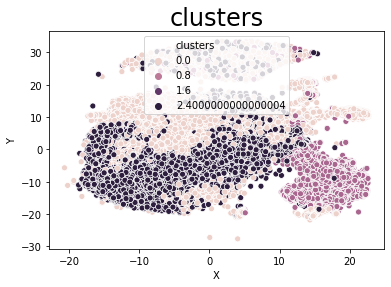

In [25]:
df = pd.DataFrame(cells_embedded, columns=['X', 'Y'])
df['clusters'] = cluster_colors
lm = sns.scatterplot(x="X", y="Y",
              hue='clusters',
              data=df)
plt.pyplot.title(f"clusters", size=24)

In [54]:
k = 12
path = fr'/storage/md_keren/shitay/outputs/kmeans/row_kmeans/kmeans_immune_cells_var0.315_k_{k}.pkl'
kmeans = pickle.load(open(path, 'rb'))

# Set colors with clusters
cluster_colors = np.zeros(filtered_cells.number_of_cells)
for cluster_idx, cluster_list in enumerate(kmeans['clusters']):
    cluster_colors[cluster_list] = cluster_idx


In [55]:
[len(ii) for ii in kmeans['clusters']]

[3527, 5, 19041, 3083, 13309, 24460, 5080, 5009, 3166, 1026, 6521, 4797]

# DEBUG

Variance 0.315
Counts shape (89024, 4074)


Text(0.5, 1.0, 'Variance > 0.315, 4074 genes')

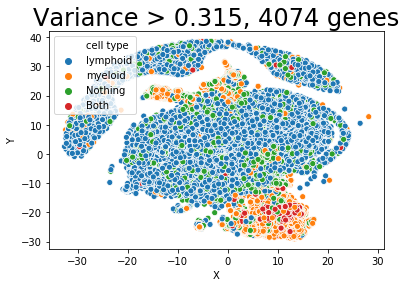

In [2]:
variance = 0.315
print(f"Variance {variance}")
filtered_cells_path = fr'/storage/md_keren/shitay/outputs/variance_filtered/immune_cells_var{variance}.pkl'
filtered_cells = pickle.load(open(filtered_cells_path, 'rb'))
print(f'Counts shape {filtered_cells.counts.shape}')
TSNE_path = fr'/storage/md_keren/shitay/outputs/TSNE/immune_TSNE_embedded_var0.315_float16.pkl'

cells_embedded = pickle.load(open(TSNE_path, 'rb'))
# plt.pyplot.scatter(cells_embedded[:,0], cells_embedded[:,1], c=filtered_cells.get_myeloid_lymphoid_map()[0])

df = pd.DataFrame(cells_embedded, columns=['X', 'Y'])
df["cell type"] = filtered_cells.get_myeloid_lymphoid_map()[1]
lm = sns.scatterplot(x="X", y="Y",
              hue="cell type",
              data=df)
plt.pyplot.title(f"Variance > {variance}, {filtered_cells.counts.shape[1]} genes", size=24)

Text(0.5, 1.0, 'T cells')

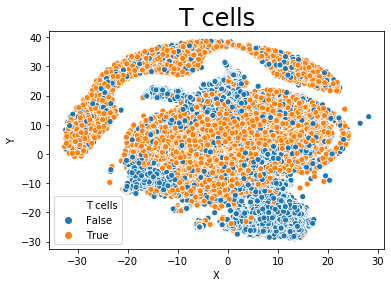

In [4]:
df = pd.DataFrame(cells_embedded, columns=['X', 'Y'])
cell_type = 'T cells'
df[cell_type] = [cell_type in vv for vv in filtered_cells.cells_information.getattr('cell_type_list')]
lm = sns.scatterplot(x="X", y="Y",
              hue=cell_type,
              data=df)
plt.pyplot.title(f"{cell_type}", size=24)

# Debug

In [ ]:
variance = 0.315
print(f"Variance {variance}")
filtered_cells_path = fr'/storage/md_keren/shitay/outputs/variance_filtered/immune_cells_var{variance}.pkl'
filtered_cells = pickle.load(open(filtered_cells_path, 'rb'))
print(f'Counts shape {filtered_cells.counts.shape}')
TSNE_path = fr'/storage/md_keren/shitay/outputs/TSNE/immune_cells_bhtsne_21.4.21.pkl'

cells_embedded = pickle.load(open(TSNE_path, 'rb'))
# plt.pyplot.scatter(cells_embedded[:,0], cells_embedded[:,1], c=filtered_cells.get_myeloid_lymphoid_map()[0])

df = pd.DataFrame(cells_embedded, columns=['X', 'Y'])
df["cell type"] = filtered_cells.get_myeloid_lymphoid_map()[1]
lm = sns.scatterplot(x="X", y="Y",
              hue="cell type",
              data=df)
plt.pyplot.title(f"TSNE", size=24)

Text(0.5, 1.0, 'B cells')

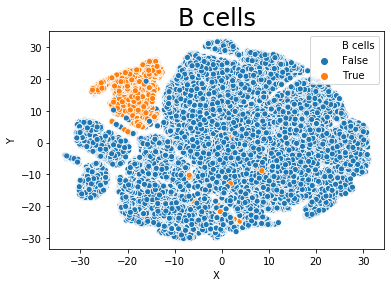

In [41]:
df = pd.DataFrame(cells_embedded, columns=['X', 'Y'])
cell_type = 'B cells'
df[cell_type] = [cell_type in vv for vv in filtered_cells.cells_information.getattr('cell_type_list')]
lm = sns.scatterplot(x="X", y="Y",
              hue=cell_type,
              data=df)
plt.pyplot.title(f"{cell_type}", size=24)

Text(0.5, 1.0, 'T cells')

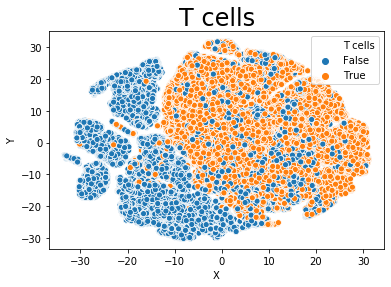

In [42]:
df = pd.DataFrame(cells_embedded, columns=['X', 'Y'])
cell_type = 'T cells'
df[cell_type] = [cell_type in vv for vv in filtered_cells.cells_information.getattr('cell_type_list')]
lm = sns.scatterplot(x="X", y="Y",
              hue=cell_type,
              data=df)
plt.pyplot.title(f"{cell_type}", size=24)

Text(0.5, 1.0, 'Activated T cells')

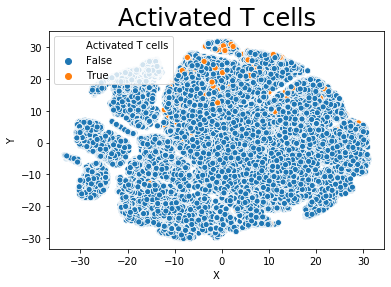

In [64]:
df = pd.DataFrame(cells_embedded, columns=['X', 'Y'])
cell_type = 'Activated T cells'
df[cell_type] = [cell_type in vv for vv in filtered_cells.cells_information.getattr('cell_type_list')]
lm = sns.scatterplot(x="X", y="Y",
              hue=cell_type,
              data=df)
plt.pyplot.title(f"{cell_type}", size=24)

Text(0.5, 1.0, 'Exhausted T cells')

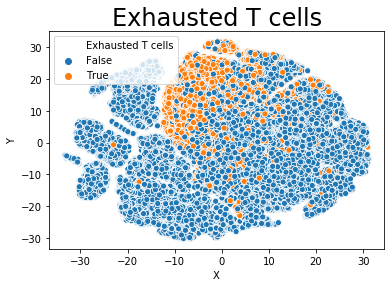

In [65]:
df = pd.DataFrame(cells_embedded, columns=['X', 'Y'])
cell_type = 'Exhausted T cells'
df[cell_type] = [cell_type in vv for vv in filtered_cells.cells_information.getattr('cell_type_list')]
lm = sns.scatterplot(x="X", y="Y",
              hue=cell_type,
              data=df)
plt.pyplot.title(f"{cell_type}", size=24)

Text(0.5, 1.0, 'Memory CD4 T cells')

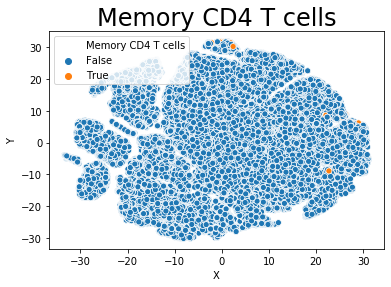

In [66]:
df = pd.DataFrame(cells_embedded, columns=['X', 'Y'])
cell_type = 'Memory CD4 T cells'
df[cell_type] = [cell_type in vv for vv in filtered_cells.cells_information.getattr('cell_type_list')]
lm = sns.scatterplot(x="X", y="Y",
              hue=cell_type,
              data=df)
plt.pyplot.title(f"{cell_type}", size=24)

Text(0.5, 1.0, 'CD8 Cytotoxic T cells')

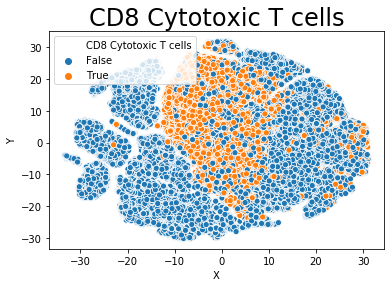

In [67]:
df = pd.DataFrame(cells_embedded, columns=['X', 'Y'])
cell_type = 'CD8 Cytotoxic T cells'
df[cell_type] = [cell_type in vv for vv in filtered_cells.cells_information.getattr('cell_type_list')]
lm = sns.scatterplot(x="X", y="Y",
              hue=cell_type,
              data=df)
plt.pyplot.title(f"{cell_type}", size=24)

Text(0.5, 1.0, 'Regulatory CD4 T cells')

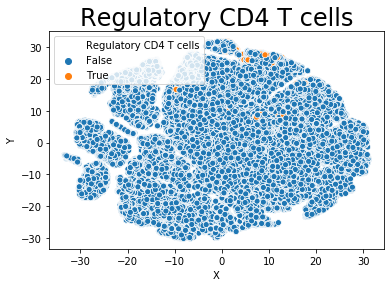

In [68]:
df = pd.DataFrame(cells_embedded, columns=['X', 'Y'])
cell_type = 'Regulatory CD4 T cells'
df[cell_type] = [cell_type in vv for vv in filtered_cells.cells_information.getattr('cell_type_list')]
lm = sns.scatterplot(x="X", y="Y",
              hue=cell_type,
              data=df)
plt.pyplot.title(f"{cell_type}", size=24)

Text(0.5, 1.0, 'Regulatory CD8 T cells')

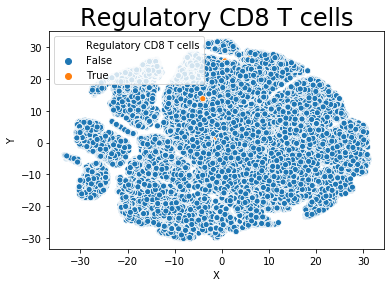

In [69]:
df = pd.DataFrame(cells_embedded, columns=['X', 'Y'])
cell_type = 'Regulatory CD8 T cells'
df[cell_type] = [cell_type in vv for vv in filtered_cells.cells_information.getattr('cell_type_list')]
lm = sns.scatterplot(x="X", y="Y",
              hue=cell_type,
              data=df)
plt.pyplot.title(f"{cell_type}", size=24)

Text(0.5, 1.0, 'CD4 helper T cells')

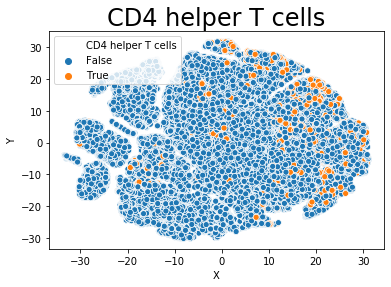

In [70]:
df = pd.DataFrame(cells_embedded, columns=['X', 'Y'])
cell_type = 'CD4 helper T cells'
df[cell_type] = [cell_type in vv for vv in filtered_cells.cells_information.getattr('cell_type_list')]
lm = sns.scatterplot(x="X", y="Y",
              hue=cell_type,
              data=df)
plt.pyplot.title(f"{cell_type}", size=24)

Text(0.5, 1.0, 'cDCs_dendritic_cells')

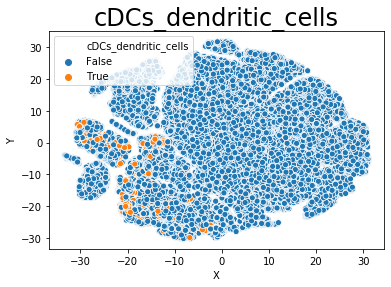

In [55]:
df = pd.DataFrame(cells_embedded, columns=['X', 'Y'])
cell_type = 'cDCs_dendritic_cells'
df[cell_type] = [cell_type in vv for vv in filtered_cells.cells_information.getattr('cell_type_list')]
lm = sns.scatterplot(x="X", y="Y",
              hue=cell_type,
              data=df)
plt.pyplot.title(f"{cell_type}", size=24)

Text(0.5, 1.0, 'Neutrophils')

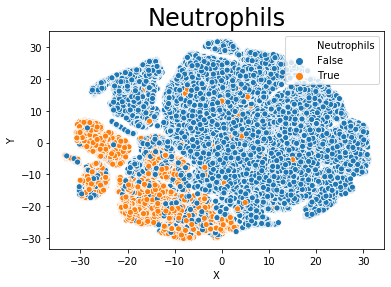

In [56]:
df = pd.DataFrame(cells_embedded, columns=['X', 'Y'])
cell_type = 'Neutrophils'
df[cell_type] = [cell_type in vv for vv in filtered_cells.cells_information.getattr('cell_type_list')]
lm = sns.scatterplot(x="X", y="Y",
              hue=cell_type,
              data=df)
plt.pyplot.title(f"{cell_type}", size=24)

Text(0.5, 1.0, 'NK cells')

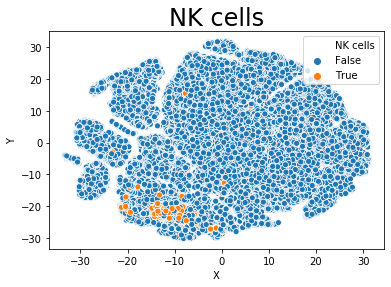

In [57]:
df = pd.DataFrame(cells_embedded, columns=['X', 'Y'])
cell_type = 'NK cells'
df[cell_type] = [cell_type in vv for vv in filtered_cells.cells_information.getattr('cell_type_list')]
lm = sns.scatterplot(x="X", y="Y",
              hue=cell_type,
              data=df)
plt.pyplot.title(f"{cell_type}", size=24)

Text(0.5, 1.0, 'Granolocytes')

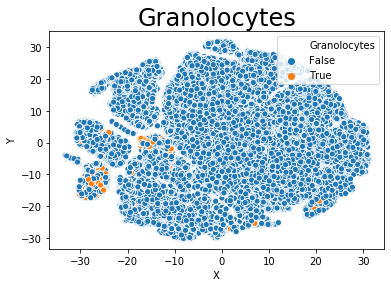

In [58]:
df = pd.DataFrame(cells_embedded, columns=['X', 'Y'])
cell_type = 'Granolocytes'
df[cell_type] = [cell_type in vv for vv in filtered_cells.cells_information.getattr('cell_type_list')]
lm = sns.scatterplot(x="X", y="Y",
              hue=cell_type,
              data=df)
plt.pyplot.title(f"{cell_type}", size=24)

Text(0.5, 1.0, 'Macrophage_immature')

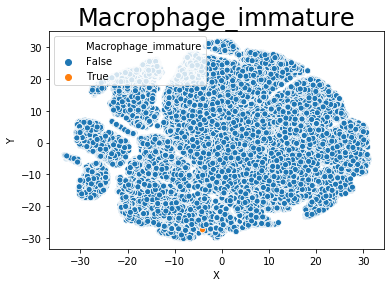

In [59]:
df = pd.DataFrame(cells_embedded, columns=['X', 'Y'])
cell_type = 'Macrophage_immature'
df[cell_type] = [cell_type in vv for vv in filtered_cells.cells_information.getattr('cell_type_list')]
lm = sns.scatterplot(x="X", y="Y",
              hue=cell_type,
              data=df)
plt.pyplot.title(f"{cell_type}", size=24)

Text(0.5, 1.0, 'Macrophage_mature')

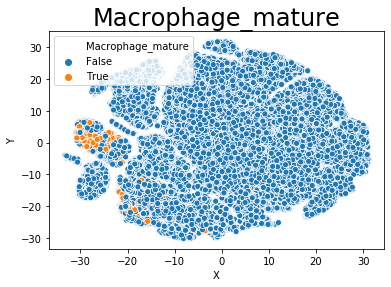

In [60]:
df = pd.DataFrame(cells_embedded, columns=['X', 'Y'])
cell_type = 'Macrophage_mature'
df[cell_type] = [cell_type in vv for vv in filtered_cells.cells_information.getattr('cell_type_list')]
lm = sns.scatterplot(x="X", y="Y",
              hue=cell_type,
              data=df)
plt.pyplot.title(f"{cell_type}", size=24)

Text(0.5, 1.0, 'Monocyte_mature')

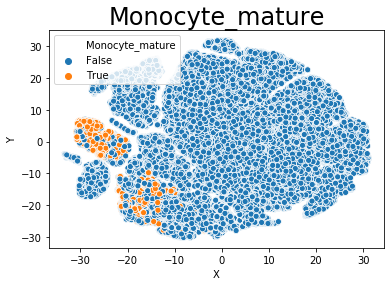

In [61]:
df = pd.DataFrame(cells_embedded, columns=['X', 'Y'])
cell_type = 'Monocyte_mature'
df[cell_type] = [cell_type in vv for vv in filtered_cells.cells_information.getattr('cell_type_list')]
lm = sns.scatterplot(x="X", y="Y",
              hue=cell_type,
              data=df)
plt.pyplot.title(f"{cell_type}", size=24)

Text(0.5, 1.0, 'Monocyte_immature')

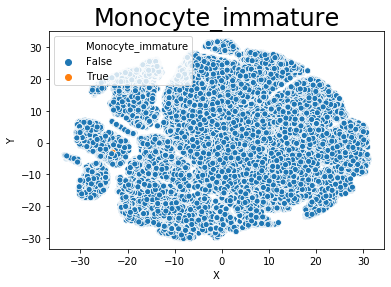

In [63]:
df = pd.DataFrame(cells_embedded, columns=['X', 'Y'])
cell_type = 'Monocyte_immature'
df[cell_type] = [cell_type in vv for vv in filtered_cells.cells_information.getattr('cell_type_list')]
lm = sns.scatterplot(x="X", y="Y",
              hue=cell_type,
              data=df)
plt.pyplot.title(f"{cell_type}", size=24)

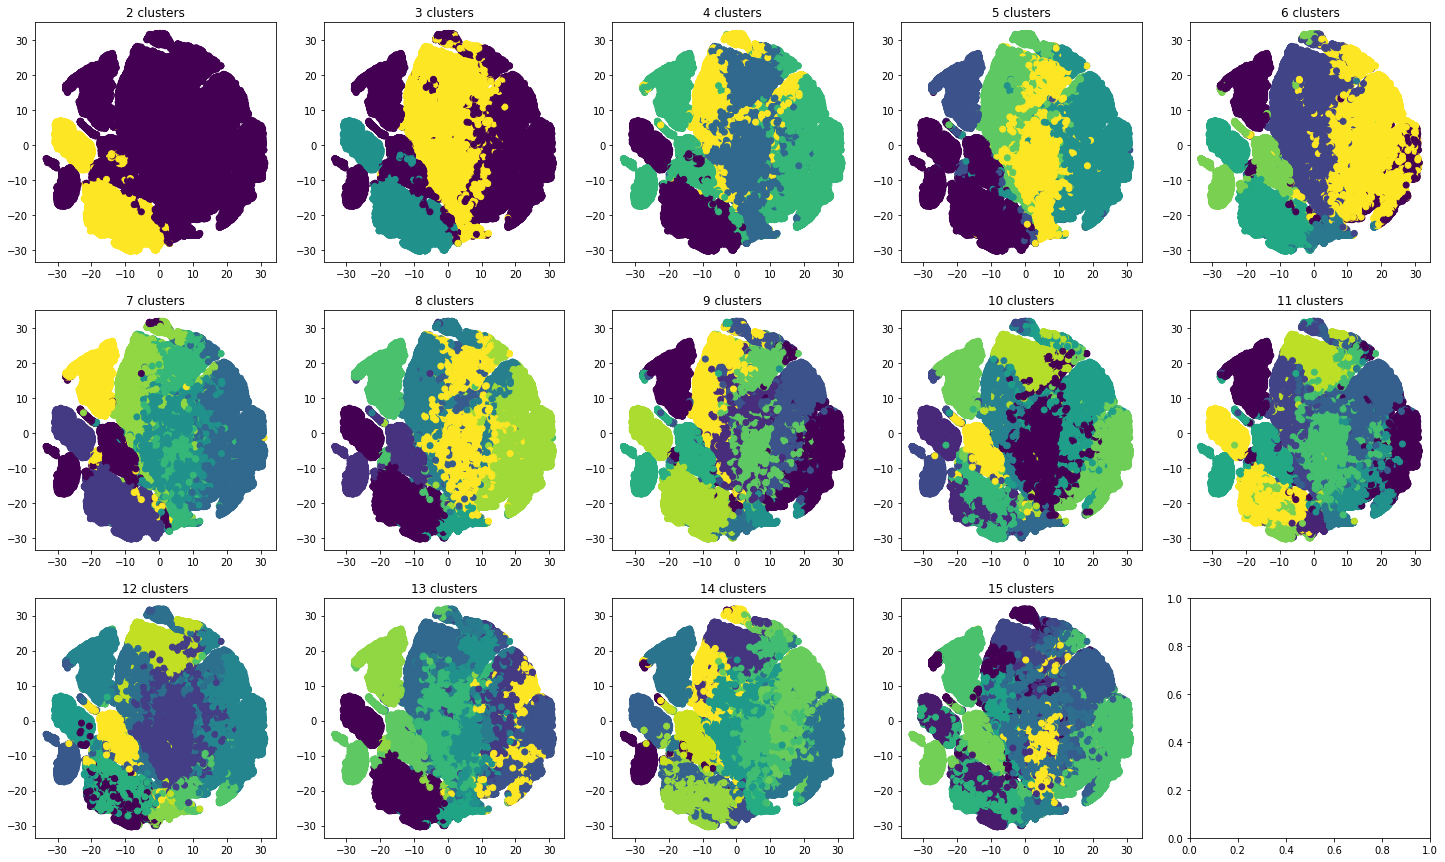

In [86]:
fig, axs = plt.pyplot.subplots(3, 5)
fig.set_size_inches(25, 15)

i = 0
j = 0
for k in range(2, 16):
       
    path = fr'/storage/md_keren/shitay/outputs/clustering/kmeans/row_kmeans/kmeans_immune_cells_var0.315_k_{k}.pkl'
    kmeans = pickle.load(open(path, 'rb'))

    # Set colors with clusters
    cluster_colors = np.zeros(filtered_cells.number_of_cells)
    for cluster_idx, cluster_list in enumerate(kmeans['clusters']):
        cluster_colors[cluster_list] = cluster_idx

    axs[i][j].scatter(cells_embedded[:,0], cells_embedded[:,1], c=cluster_colors)
    axs[i][j].set_title(f"{k} clusters")

    if j==4:
        j=0
        i += 1
    else:
        j+=1
        
#     plt.pyplot.title(f"{k} clusters", size=24)

In [53]:
cell_type = 'cDCs_dendritic_cells'
sum([cell_type in vv for vv in filtered_cells.cells_information.getattr('cell_type_list')])


2594

In [ ]:
df = pd.DataFrame(cells_embedded, columns=['X', 'Y'])
cell_type = 'NK'
df[cell_type] = [cell_type in vv for vv in filtered_cells.cells_information.getattr('cell_type_list')]
lm = sns.scatterplot(x="X", y="Y",
              hue=cell_type,
              data=df)
plt.pyplot.title(f"{cell_type}", size=24)

In [24]:
COHORT_PATH = r'/storage/md_keren/shitay/Data/droplet_seq/cohort/normalized/cohort.pkl'

In [25]:
cohort = pickle.load(open(COHORT_PATH, 'rb'))

In [26]:
cohort = cohort.filter_cells_by_property('is_cancer', True)

In [7]:
# big_variance_genes = np.var(self.counts, axis=0) > variance
# filtered_cells = self.counts[:, big_variance_genes]
variance_genes = np.var(cohort.counts, axis=0)


In [19]:
order = np.flip(np.argsort(variance_genes))
variance_genes[order][4004]
variance = 0.272

In [22]:
gene_sum = np.sum(cohort.counts, axis=0)

In [26]:
cancer_cohort = cohort

In [29]:
cancer_cohort.counts.shape

(109283, 32738)

In [31]:
np.sum(np.sum(cohort.counts, axis=0)==0)

2366

In [35]:
2366/cohort.counts.shape[1]


0.07227075569674385

In [99]:
immune_cohort = cohort.filter_cells_by_property('is_immune', True)

In [100]:
variance_genes = np.var(immune_cohort.counts, axis=0)
order = np.flip(np.argsort(variance_genes))


In [104]:
# sum(0.315<variance_genes[order])
# variance_genes.shape
# immune_cohort.counts.shape
variance_genes[order][4070]


0.3152416573414731

In [107]:
np.sum(np.sum(immune_cohort.counts, axis=0)==0)

4492

In [111]:
np.sum(np.sum(immune_cohort.counts[:,order[:4070]], axis=0)==0)

0

In [117]:
indices = np.sum(cancer_cohort.counts, axis=0)!=0

In [125]:
cancer_cohort.counts[:, indices].shape

(109283, 29481)

In [132]:
cancer_cohort.counts = cancer_cohort.counts[:, indices]
cancer_cohort.gene_names = [cancer_cohort.gene_names[i] for i in range(len(cancer_cohort.gene_names)) if indices[i]]
cancer_cohort.features = [cancer_cohort.features[i] for i in range(len(cancer_cohort.features)) if indices[i]]
cancer_cohort.number_of_genes = sum(indices)

In [141]:
pickle.dump((cancer_cohort), open(r'/storage/md_keren/shitay/Data/droplet_seq/cohort/normalized/tumor_cells.pkl', 'wb'), protocol=4)

In [ ]:
#### TODO: save now variance filtered

In [ ]:
cancer_cohort.filter_

In [3]:
cancer_cohort = pickle.load(open(r'/storage/md_keren/shitay/Data/droplet_seq/cohort/normalized/tumor_cells.pkl', 'rb'))

In [7]:
filtered_cancer_cohort = cancer_cohort.filter_genes_by_variance(0.272)

Dataset was cleared from genes with variance of less than 0.272


In [11]:

pickle.dump((filtered_cancer_cohort), open(r'/storage/md_keren/shitay/Data/droplet_seq/cohort/normalized/tumor_cells_var0.272.pkl', 'wb'), protocol=4)

In [35]:
path = r'/storage/md_keren/shitay/Data/droplet_seq/cohort/normalized/cohort.pkl'
non_normalized = pickle.load(open(path, 'rb'))

In [44]:
non_normalized.counts.shape

(226484, 32738)

In [45]:
gene_var  = np.var(non_normalized.counts, axis =0)

In [46]:
order = np.flip(np.argsort(gene_var))

In [47]:
order

array([18122,   394, 25845, ..., 18392, 30034, 30672])

In [58]:
gene_var[order][4020]

0.311160828309196

In [51]:
non_normalized.counts.shape


(226484, 32738)

In [59]:
filtered = non_normalized.filter_genes_by_variance(0.312)

Dataset was cleared from genes with variance of less than 0.312


In [62]:
filtered.counts.shape

(226484, 4012)

In [63]:
filtered.counts

array([[0.        , 0.72219333, 0.        , ..., 0.        , 1.20124259,
        2.47192021],
       [0.        , 0.        , 0.53527276, ..., 0.53527276, 1.88569021,
        0.9248085 ],
       [0.        , 0.70273626, 0.        , ..., 1.17324106, 0.        ,
        0.70273626],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        1.8450639 ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        4.0228587 ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [65]:
pickle.load(open(r'/storage/md_keren/shitay/Data/droplet_seq/cohort/normalized/cohort_var0.312.pkl', 'rb'))